In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, time
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
from qiskit import Aer, QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance
from qiskit.aqua.algorithms import QSVM
from qiskit.visualization import circuit_drawer
from sklearn.model_selection import train_test_split

c:\Users\Judah\anaconda3\envs\qiskit_exp\lib\site-packages\qiskit\circuit\equivalence.py:18: DeprecationWarning: The retworkx package is deprecated and has been renamed to rustworkx. Rustworkx is a drop-in replacement and can be used by replacing `import retworkx` with import `rustworkx`. 
  import retworkx as rx
c:\Users\Judah\anaconda3\envs\qiskit_exp\lib\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


In [3]:
def processing(n, scale=False):
    df = pd.read_csv(f'../Data/{n}-Features Processed Breast Cancer Data.csv')
    X, y = df.drop(['diagnosis'], axis=1), df['diagnosis']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    if scale: X_train, X_test = (X_train - X_train.min())/(X_train.max() - X_train.min()), (X_test - X_test.min())/(X_test.max() - X_test.min())
    
    Xy_train = pd.concat([pd.DataFrame(X_train, columns=X.columns), y_train.map({0: 'A', 1: 'B'})], axis=1)
    Xy_test = pd.concat([pd.DataFrame(X_test, columns=X.columns), y_test.map({0: 'A', 1: 'B'})], axis=1)
    
    Xy_train_grouped = Xy_train.groupby('diagnosis')
    Xy_train_grouped_dict = {}
    for key, group in Xy_train_grouped: Xy_train_grouped_dict[key] = group.drop(columns='diagnosis').values
    
    Xy_test_grouped = Xy_test.groupby('diagnosis')
    Xy_test_grouped_dict = {}
    for key, group in Xy_test_grouped: Xy_test_grouped_dict[key] = group.drop(columns='diagnosis').values
    
    return X, y, X_train, y_train, np.asarray(X_test), y_test, Xy_train_grouped_dict, Xy_test_grouped_dict


X2, y2, X2_train, y2_train, X2_test, y2_test, Xy2_train_grouped_dict, Xy2_test_grouped_dict = processing(2)
X5, y5, X5_train, y5_train, X5_test, y5_test, Xy5_train_grouped_dict, Xy5_test_grouped_dict = processing(5)
X10, y10, X10_train, y10_train, X10_test, y10_test, Xy10_train_grouped_dict, Xy10_test_grouped_dict = processing(10)
X15, y15, X15_train, y15_train, X15_test, y15_test, Xy15_train_grouped_dict, Xy15_test_grouped_dict = processing(15)
X20, y20, X20_train, y20_train, X20_test, y20_test, Xy20_train_grouped_dict, Xy20_test_grouped_dict = processing(20)
X25, y25, X25_train, y25_train, X25_test, y25_test, Xy25_train_grouped_dict, Xy25_test_grouped_dict = processing(25)
X30, y30, X30_train, y30_train, X30_test, y30_test, Xy30_train_grouped_dict, Xy30_test_grouped_dict = processing(30)

X2, y2, X2_train_scaled, y2_train_scaled, X2_test, y2_test, Xy2_train_scaled_grouped_dict, Xy2_test_scaled_grouped_dict = processing(2, scale=True)
X5, y5, X5_train_scaled, y5_train_scaled, X5_test, y5_test, Xy5_train_scaled_grouped_dict, Xy5_test_scaled_grouped_dict = processing(5, scale=True)
X10, y10, X10_train_scaled, y10_train_scaled, X10_test, y10_test, Xy10_train_scaled_grouped_dict, Xy10_test_scaled_grouped_dict = processing(10, scale=True)
X15, y15, X15_train_scaled, y15_train_scaled, X15_test, y15_test, Xy15_train_scaled_grouped_dict, Xy15_test_scaled_grouped_dict = processing(15, scale=True)
X20, y20, X20_train_scaled, y20_train_scaled, X20_test, y20_test, Xy20_train_scaled_grouped_dict, Xy20_test_scaled_grouped_dict = processing(20, scale=True)
X25, y25, X25_train_scaled, y25_train_scaled, X25_test, y25_test, Xy25_train_scaled_grouped_dict, Xy25_test_scaled_grouped_dict = processing(25, scale=True)
X30, y30, X30_train_scaled, y30_train_scaled, X30_test, y30_test, Xy30_train_scaled_grouped_dict, Xy30_test_scaled_grouped_dict = processing(30, scale=True)

In [13]:
Xy10_test_grouped_dict

{'A': array([[0.19509945, 0.15174941, 0.20710027, 0.3540286 , 0.21323921,
         0.24171946, 0.29206797, 0.27899016, 0.30094852, 0.28664495],
        [0.18697031, 0.10182333, 0.15170732, 0.25706313, 0.20620671,
         0.21746606, 0.29504346, 0.23962345, 0.29711059, 0.20154723],
        [0.14955319, 0.08395959, 0.14059621, 0.24129752, 0.17946191,
         0.16262443, 0.24164122, 0.17342136, 0.24995888, 0.17630293],
        [0.21706544, 0.13234569, 0.37869919, 0.59574468, 0.31140117,
         0.43963801, 0.33435126, 0.28271899, 0.3486485 , 0.30944625],
        [0.26284232, 0.16437723, 0.07257453, 0.21702128, 0.05924347,
         0.12524887, 0.35377026, 0.3104713 , 0.37935194, 0.29356678],
        [0.22738541, 0.13788961, 0.11208672, 0.20945239, 0.07384124,
         0.12579186, 0.31563699, 0.24989303, 0.34152092, 0.26140065],
        [0.3151917 , 0.18384255, 0.10509485, 0.20069759, 0.05186468,
         0.07013575, 0.40490173, 0.31719543, 0.43801744, 0.32776873],
        [0.18737388, 0

In [4]:
# # Load the breast cancer dataset
# data = pd.read_csv('../Data/Processed Breast Cancer Data.csv')
# data10 = pd.read_csv('../Data/10-Features Processed Breast Cancer Data.csv')
# X, y = data.drop('diagnosis', axis=1), data['diagnosis']
# X10, y10 = data10.drop('diagnosis', axis=1), data10['diagnosis']

# # data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])

# # Split the dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, test_size=0.1, random_state=42)

# # Normalize the features
# # scaler = StandardScaler()
# # X_train = scaler.fit_transform(X_train)
# # X_test = scaler.transform(X_test)

# # Feature map for QSVM
# feature_map = ZZFeatureMap(feature_dimension=X_train.shape[1], reps=2, entanglement='linear')
# feature_map10 = ZZFeatureMap(feature_dimension=X10_train.shape[1], reps=2, entanglement='linear')

# # main_circuit = QuantumCircuit(feature_map.num_qubits)
# # main_circuit10 = QuantumCircuit(feature_map10.num_qubits)

# # circuits = []
# # for point in np.array(X_train[:3]):
# #     param_dict = {param: value for param, value in zip(feature_map.parameters, point)}
# #     single_circuit = feature_map.assign_parameters(param_dict, inplace=False)
# #     main_circuit.compose(single_circuit, inplace=True)
    
# # main_circuit.draw(output='mpl')

# # circuits10 = []
# # for point in np.array(X10_train[:10]):
# #     param_dict = {param: value for param, value in zip(feature_map10.parameters, point)}
# #     single_circuit = feature_map10.assign_parameters(param_dict, inplace=False)
# #     main_circuit10.compose(single_circuit, inplace=True)
    
# # main_circuit10.draw(output='mpl')

In [5]:
def zz_feature_mapping(feature_dimension, reps=2, entanglement='linear'): return ZZFeatureMap(feature_dimension=feature_dimension, reps=reps, entanglement=entanglement)

def qsvm_train_test(quantum_feature_map, Xy_train_grouped_dict, Xy_test_grouped_dict, n, aer_backend='statevector_simulator', shots=1024, seed=42):

    qsvm = QSVM(quantum_feature_map, Xy_train_grouped_dict, Xy_test_grouped_dict)
    backend = Aer.get_backend(aer_backend)
    quantum_instance = QuantumInstance(backend, shots=shots, seed_simulator=seed, seed_transpiler=seed)
    
    train_start_time = time.time()
    result = qsvm.run(quantum_instance)
    train_end_time = time.time()
    
    print(f'x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-{n} MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x\n')    
    print(f"Total training time: {train_end_time - train_start_time:.2f} seconds")
    print(f"Testing accuracy: {result['testing_accuracy'] * 100:.2f}%")
    
    return qsvm, (train_end_time - train_start_time), result['testing_accuracy'], quantum_instance   
    
    
def qsvm_predict_accuracy(qsvm_model, X_test, y_test, quantum_instance):
    
    pred_start_time = time.time()
    y_pred = qsvm_model.predict(X_test, quantum_instance)
    pred_end_time = time.time()
    
    print(f"Total prediction time: {pred_end_time - pred_start_time:.2f} seconds\n")
    
    print(classification_report(y_test, y_pred, zero_division=True))

    sns.heatmap(pd.DataFrame(np.array(confusion_matrix(np.asarray(y_test), y_pred, labels=[1, 0])), index=['Actual Malignant', 'Actual Benign'], columns=['Predicted Malignant', 'Predicted Benign']), annot=True)
    
    precision, recall, _ = precision_recall_curve(y_test, y_pred)

    # Plot the Precision-Recall curve
    plt.figure()
    plt.plot(recall, precision, lw=2, color='orange', label=f'AUPRC: {auc(recall, precision):.2f})')
    # plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')

    # Adding labels and title
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for Binary Classification')
    plt.legend(loc='best')
    plt.show()
    
    plt.show()
    
    return y_pred

In [ ]:
X2_feature_map = zz_feature_mapping(X2.shape[1], reps= 1)
# qsvm2_model = qsvm_train_test(X2_feature_map, Xy2_train_grouped_dict, Xy2_test_grouped_dict, 2)
# y_pred2 = qsvm_predict_accuracy(qsvm2_model[0], X2_test, y2_test, qsvm2_model[3])

c:\Users\Judah\anaconda3\envs\qiskit_exp\lib\site-packages\qiskit\aqua\algorithms\classifiers\qsvm\qsvm.py:102: DeprecationWarning: The package qiskit.aqua.algorithms.classifiers is deprecated. It was moved/refactored to qiskit_machine_learning.algorithms.classifiers (pip install qiskit-machine-learning). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua.algorithms.classifiers',
c:\Users\Judah\anaconda3\envs\qiskit_exp\lib\site-packages\qiskit\aqua\algorithms\classifiers\qsvm\qsvm.py:314: DeprecationWarning: The variable qiskit.aqua.aqua_globals is deprecated. It was moved/refactored to qiskit.utils.algorithm_globals (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  num_processes=aqua_globals.num_processes)


x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-5 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x

Total training time: 17.84 seconds
Testing accuracy: 77.19%
Total prediction time: 7.20 seconds

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        71
           1       0.69      0.72      0.70        43

    accuracy                           0.77       114
   macro avg       0.76      0.76      0.76       114
weighted avg       0.77      0.77      0.77       114



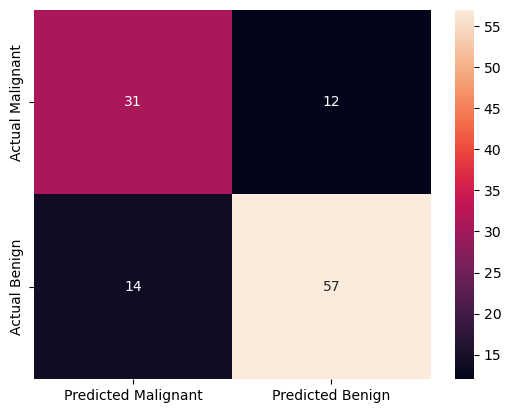

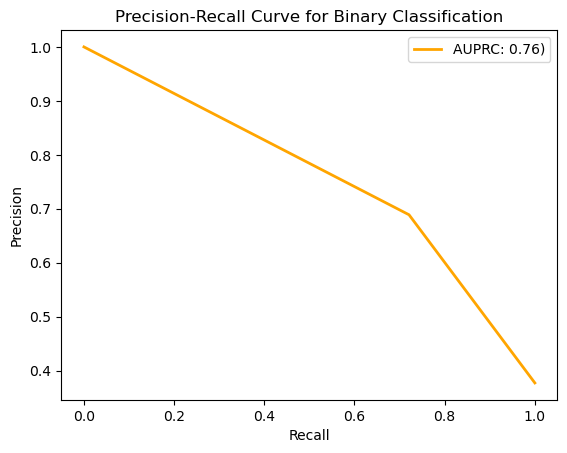

In [7]:
X5_feature_map = zz_feature_mapping(X5.shape[1], reps=4, entanglement='linear')
qsvm5_model = qsvm_train_test(X5_feature_map, Xy5_train_grouped_dict, Xy5_test_grouped_dict, 5, shots=5000)
y_pred5 = qsvm_predict_accuracy(qsvm5_model[0], X5_test, y5_test, qsvm5_model[3])

x-x-x-x-x-x-x-x-x-x-x-x-x   SVM-10 MODEL   x-x-x-x-x-x-x-x-x-x-x-x-x

Total training time: 43.93 seconds
Testing accuracy: 62.28%
Total prediction time: 24.08 seconds

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        71
           1       1.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.81      0.50      0.38       114
weighted avg       0.77      0.62      0.48       114



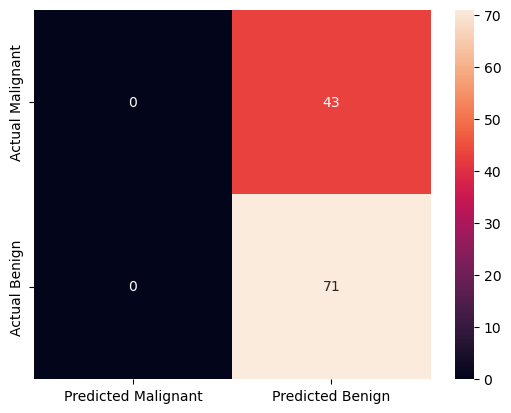

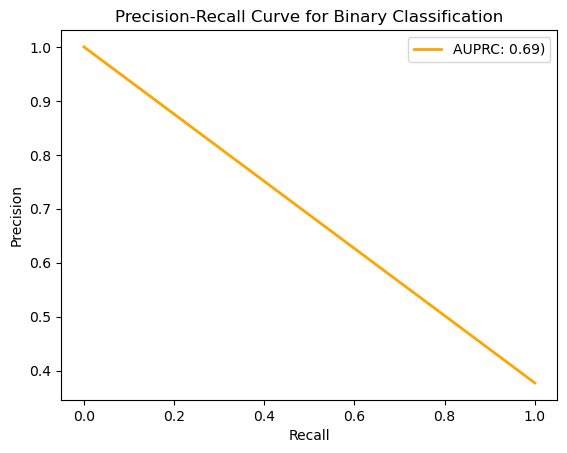

In [11]:
X10_feature_map = zz_feature_mapping(X10.shape[1], reps=5)
qsvm10_model = qsvm_train_test(X10_feature_map, Xy10_train_grouped_dict, Xy10_test_grouped_dict, 10, shots=1024)
y_pred10 = qsvm_predict_accuracy(qsvm10_model[0], X10_test, y10_test, qsvm10_model[3])

In [9]:
print(X15_feature_map)

      ┌───┐ ┌──────────────┐     »
 q_0: ┤ H ├─┤ U1(2.0*x[0]) ├──■──»
      ├───┤ ├──────────────┤┌─┴─┐»
 q_1: ┤ H ├─┤ U1(2.0*x[1]) ├┤ X ├»
      ├───┤ ├──────────────┤└───┘»
 q_2: ┤ H ├─┤ U1(2.0*x[2]) ├─────»
      ├───┤ ├──────────────┤     »
 q_3: ┤ H ├─┤ U1(2.0*x[3]) ├─────»
      ├───┤ ├──────────────┤     »
 q_4: ┤ H ├─┤ U1(2.0*x[4]) ├─────»
      ├───┤ ├──────────────┤     »
 q_5: ┤ H ├─┤ U1(2.0*x[5]) ├─────»
      ├───┤ ├──────────────┤     »
 q_6: ┤ H ├─┤ U1(2.0*x[6]) ├─────»
      ├───┤ ├──────────────┤     »
 q_7: ┤ H ├─┤ U1(2.0*x[7]) ├─────»
      ├───┤ ├──────────────┤     »
 q_8: ┤ H ├─┤ U1(2.0*x[8]) ├─────»
      ├───┤ ├──────────────┤     »
 q_9: ┤ H ├─┤ U1(2.0*x[9]) ├─────»
      ├───┤┌┴──────────────┤     »
q_10: ┤ H ├┤ U1(2.0*x[10]) ├─────»
      ├───┤├───────────────┤     »
q_11: ┤ H ├┤ U1(2.0*x[11]) ├─────»
      ├───┤├───────────────┤     »
q_12: ┤ H ├┤ U1(2.0*x[12]) ├─────»
      ├───┤├───────────────┤     »
q_13: ┤ H ├┤ U1(2.0*x[13]) ├─────»
      ├───┤├────────

In [8]:
X15_feature_map = zz_feature_mapping(X15.shape[1], reps=1)
# qsvm15_model = qsvm_train_test(X15_feature_map, Xy15_train_grouped_dict, Xy15_test_grouped_dict, 15, shots=500)
# y_pred15 = qsvm_predict_accuracy(qsvm15_model[0], X15_test, y15_test, qsvm15_model[3])

In [9]:
X20_feature_map = zz_feature_mapping(X20.shape[1])
qsvm20_model = qsvm_train_test(X20_feature_map, Xy20_train_grouped_dict, Xy20_test_grouped_dict, 20)
y_pred20 = qsvm_predict_accuracy(qsvm20_model[0], X20_test, y20_test, qsvm20_model[3])

KeyboardInterrupt: 

In [6]:
X25_feature_map = zz_feature_mapping(X25.shape[1])
qsvm25_model = qsvm_train_test(X25_feature_map, Xy25_train_grouped_dict, Xy25_test_grouped_dict, 25)
y_pred25 = qsvm_predict_accuracy(qsvm25_model[0], X25_test, y25_test, qsvm25_model[3])

c:\Users\Judah\anaconda3\envs\qiskit_env\lib\site-packages\qiskit\aqua\algorithms\classifiers\qsvm\qsvm.py:102: DeprecationWarning: The package qiskit.aqua.algorithms.classifiers is deprecated. It was moved/refactored to qiskit_machine_learning.algorithms.classifiers (pip install qiskit-machine-learning). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua.algorithms.classifiers',


: 

In [ ]:
X30_feature_map = zz_feature_mapping(X30.shape[1])
qsvm30_model = qsvm_train_test(X30_feature_map, Xy30_train_grouped_dict, Xy30_test_grouped_dict, 30)
y_pred30 = qsvm_predict_accuracy(qsvm30_model[0], X30_test, y30_test, qsvm30_model[3])

In [74]:
Xy_10_train = pd.concat([pd.DataFrame(X10_train, columns=X10.columns), y10_train.map({0: 'A', 1: 'B'})], axis=1)
Xy_10_test = pd.concat([pd.DataFrame(X10_test, columns=X10.columns), y10_test.map({0: 'A', 1: 'B'})], axis=1)

In [95]:
Xy_10_train_grouped = Xy_10_train.groupby('diagnosis')
Xy_10_train_grouped_dict = {}

# Iterate over the groups and convert each to a dictionary entry
for key, group in Xy_10_train_grouped:
    Xy_10_train_grouped_dict[key] = group.drop(columns='diagnosis').values
    

Xy_10_test_grouped = Xy_10_test.groupby('diagnosis')
Xy_10_test_grouped_dict = {}

# Iterate over the groups and convert each to a dictionary entry
for key, group in Xy_10_test_grouped:
    Xy_10_test_grouped_dict[key] = group.drop(columns='diagnosis').values

In [151]:
seed = 10598  # Setting seed to ensure reproducable results

feature_map_bc = ZZFeatureMap(feature_dimension=10, reps=2, entanglement='linear')
qsvm_bc = QSVM(feature_map_bc, Xy_10_train_grouped_dict, Xy_10_test_grouped_dict)

backend = Aer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

In [152]:
result_bc = qsvm_bc.run(quantum_instance)
print(f"Testing Accuracy: {result_bc['testing_accuracy'] * 100:.2f}%")

Testing Accuracy: 70.18%


In [98]:
Xy_10_test

,area_mean,area_worst,concave points_mean,concave points_worst,concavity_mean,concavity_worst,perimeter_mean,perimeter_worst,radius_mean,radius_worst,diagnosis
204,481.9,677.9,0.03821,0.10150,0.08005,0.2671,81.09,96.05,12.47,14.97,A
70,1130.0,1866.0,0.07951,0.17890,0.10800,0.2687,123.60,165.90,18.94,24.86,B
131,748.9,1156.0,0.08087,0.15140,0.14660,0.3791,101.70,124.90,15.46,19.26,B
431,467.8,515.8,0.02799,0.07370,0.07741,0.2403,81.47,89.61,12.40,12.88,A
540,402.9,457.8,0.02594,0.06918,0.06737,0.1797,74.65,78.78,11.54,12.26,A
...,...,...,...,...,...,...,...,...,...,...,...
486,666.0,831.0,0.02791,0.07828,0.05192,0.2437,94.21,106.00,14.64,16.46,A
75,817.7,1223.0,0.06638,0.15200,0.09769,0.2829,104.10,128.80,16.07,19.77,B
249,406.3,491.8,0.02929,0.09608,0.04328,0.1804,73.87,80.88,11.52,12.65,A
238,623.9,764.0,0.04408,0.08219,0.11030,0.3064,92.55,102.50,14.22,15.75,A


In [78]:
y_pred = qsvm_bc.predict(np.asarray(Xy_10_test.drop('diagnosis', axis=1)), quantum_instance)

In [79]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0])

In [112]:
np.asarray(y10_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

              precision    recall  f1-score   support

           0       0.68      0.97      0.80        71
           1       0.85      0.26      0.39        43

    accuracy                           0.70       114
   macro avg       0.76      0.61      0.60       114
weighted avg       0.74      0.70      0.65       114



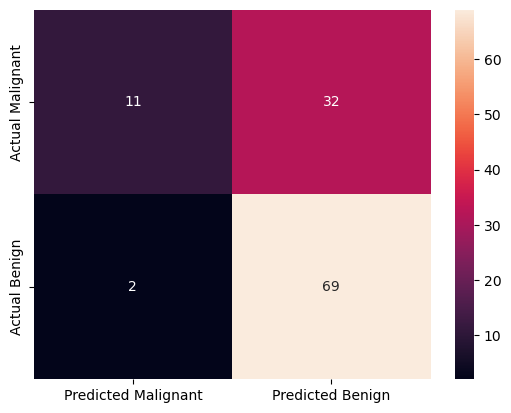

In [119]:
print(classification_report(np.asarray(y10_test), y_pred))

sns.heatmap(pd.DataFrame(np.array(confusion_matrix(np.asarray(y10_test), y_pred, labels=[1, 0])), index=['Actual Malignant', 'Actual Benign'], columns=['Predicted Malignant', 'Predicted Benign']), annot=True)
plt.show()